In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gensim
!pip install wget
  
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import zipfile
import os

In [ ]:
import wget
glove_dir = "glove"
glove_url = "https://nlp.stanford.edu/data/wordvecs/glove.42B.300d.zip"

if not os.path.exists(glove_dir):
    os.mkdir(glove_dir)

# Download glove vector
wget.download(glove_url, out=glove_dir)

In [ ]:


# Extract glove file
with zipfile.ZipFile(os.path.join("glove", "glove.42B.300d.zip"), "r") as z:
    z.extractall(glove_dir)


In [ ]:
!pip install datasets

In [ ]:
replacements = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
from datasets import load_dataset
 
dss_train = load_dataset('wikihow','all',data_dir='/content/drive/MyDrive',split='train')
dss_test = load_dataset('wikihow','all',data_dir='/content/drive/MyDrive',split='test')
dss_valid = load_dataset('wikihow','all',data_dir='/content/drive/MyDrive',split='validation')

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import pandas
ds_train = pandas.DataFrame(data=dss_train)[:10000]
ds_test = pandas.DataFrame(data=dss_test)[:5000]
ds_valid = pandas.DataFrame(data=dss_valid)[:5000]

ds_train.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
ds_train.dropna(axis=0,inplace=True)   #dropping na
ds_valid.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
ds_valid.dropna(axis=0,inplace=True)   #dropping na

ds_train.drop_duplicates(subset=['headline'],inplace=True)  #dropping duplicates
ds_train.dropna(axis=0,inplace=True)   #dropping na
ds_valid.drop_duplicates(subset=['headline'],inplace=True)  #dropping duplicates
ds_valid.dropna(axis=0,inplace=True)   #dropping na

In [ ]:
dss_train_headline = list(ds_train['headline'])
dss_train_text = list(ds_train['text'])
dss_test_headline = list(ds_test['headline'])
dss_test_text = list(ds_test['text'])
dss_valid_headline = list(ds_valid['headline'])
dss_valid_text = list(ds_valid['text'])


In [ ]:
from nltk.corpus import  stopwords
import re
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([replacements[t] if t in replacements else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()
cleaned_text_train = []
cleaned_text_val = []

for t in dss_train_text:
    cleaned_text_train.append(text_cleaner(t))
for d in dss_valid_text:
    cleaned_text_val.append(text_cleaner(d))

In [ ]:
import numpy as np
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([replacements[t] if t in replacements else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString
#Call the above function
cleaned_summary_train = []

cleaned_summary_val = []
for t in dss_train_headline:
    cleaned_summary_train.append(summary_cleaner(t))
for t in dss_valid_headline:
    cleaned_summary_val.append(summary_cleaner(t))
ds_train['text']=cleaned_text_train
ds_train['headline']=cleaned_summary_train
ds_train['headline'].replace('', np.nan, inplace=True)
ds_train.dropna(axis=0,inplace=True)

ds_valid['text']=cleaned_text_val
ds_valid['headline']=cleaned_summary_val
ds_valid['headline'].replace('', np.nan, inplace=True)
ds_valid.dropna(axis=0,inplace=True)

In [ ]:
ds_train['headline'] = ds_train['headline'].apply(lambda x : " seosartt " + x + "  teosarss ")
ds_valid['headline'] = ds_valid['headline'].apply(lambda x : " seosartt "+ x + " teosarss ")


text       302.464132
summary     52.110555
dtype: float64


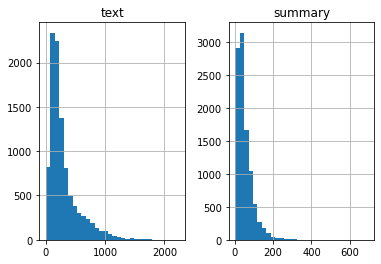

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []
# populate the lists with sentence lengths
for i in ds_train['text']:
      text_word_count.append(len(i.split()))
for i in ds_train['headline']:
      summary_word_count.append(len(i.split()))
length_df = pandas.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
print(length_df.mean())


In [ ]:
from tensorflow import keras 


In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
def generate_dict(data_arr,content_max_len,*args, **kwargs):
    #prepare a tokenizer for reviews on training data
    _tokenizer = Tokenizer()

    if len(args) > 0:
        cnt = args[0]
        print(cnt)
        if cnt:
            _tokenizer = Tokenizer(num_words=cnt)
            print("found")

    _tokenizer.fit_on_texts(list(data_arr))
    #convert text sequences into integer sequences
    data_arr    =   _tokenizer.texts_to_sequences(data_arr) 
    #padding zero upto maximum length
    data_arr    =   pad_sequences(data_arr,  maxlen=content_max_len, padding='post') 
    vocabulary_size   =  len(_tokenizer.word_index) +1
    return (data_arr,vocabulary_size,_tokenizer)

In [ ]:

thresh=50

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in train_tokenizer_text.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 85.04577822990844
Total Coverage of rare words: 8.675018499045194


In [ ]:
d_cnt = tot_cnt-cnt


In [ ]:
seq_train_text,vocab_size_train_text, train_tokenizer_text = generate_dict(ds_train['text'],303, d_cnt)
seq_train_summary,vocab_size_summary, train_tokenizer_summary = generate_dict(ds_train['headline'],53)

6321
found


In [ ]:
seq_valid_text,vocab_size_val_text, val_tokenizer_text = generate_dict(ds_valid['text'],303, d_cnt)
seq_valid_summary,vocab_size_val_summary, val_tokenizer_summary = generate_dict(ds_valid['headline'],53, d_cnt)

6321
found
6321
found


In [ ]:

ind=[]
for i in range(len(seq_train_summary)):
    cnt=0
    for j in seq_train_summary[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

seq_train_summary=np.delete(seq_train_summary,ind, axis=0)
seq_train_text=np.delete(seq_train_text,ind, axis=0)


In [ ]:
seq_train_text.shape

(9995, 303)

In [ ]:

ind=[]
for i in range(len(seq_valid_summary)):
    cnt=0
    for j in seq_valid_summary[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

seq_valid_summary=np.delete(seq_valid_summary,ind, axis=0)
seq_valid_text=np.delete(seq_valid_text,ind, axis=0)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import collections
import pickle
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
from gensim.test.utils import get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec


def build_dict(step, toy=False):
    stop_words = set(stopwords.words('english'))
    if step == "train":

        words = list()
        for sent in ds_train['text'][:5000] + ds_train['headline'][:5000]:
            for word in sent.split():
                words.append(word)

        word_counter = collections.Counter(words).most_common()
        word_dict = dict()
       
        for word, _ in word_counter:
            word_dict[word] = len(word_dict)
        word_dict['mepadding'] = 0
        with open("word_dict.pickle", "wb") as f:
            pickle.dump(word_dict, f)

    elif step == "valid":
        with open("word_dict.pickle", "rb") as f:
            word_dict = pickle.load(f)

    reversed_dict = dict(zip(word_dict.values(), word_dict.keys()))

    article_max_len = 303
    summary_max_len = 53

    return word_dict, reversed_dict, article_max_len, summary_max_len



def batch_iter(inputs, outputs, batch_size, num_epochs):
    inputs = np.array(inputs)
    outputs = np.array(outputs)

    num_batches_per_epoch = (len(inputs) - 1) // batch_size + 1
    for epoch in range(num_epochs):
        for batch_num in range(num_batches_per_epoch):
            start_index = batch_num * batch_size
            end_index = min((batch_num + 1) * batch_size, len(inputs))
            yield inputs[start_index:end_index], outputs[start_index:end_index]

def get_init_embedding(reversed_dict, embedding_size):
    glove_file = "glove/glove.42B.300d.txt"
    word2vec_file = get_tmpfile("word2vec_format.vec")
    glove2word2vec(glove_file, word2vec_file)
    print("Loading Glove vectors...")
    word_vectors = KeyedVectors.load_word2vec_format(word2vec_file)

    word_vec_list = list()
    for _, word in sorted(reversed_dict.items()):
        try:
            word_vec = word_vectors.word_vec(word)
        except KeyError:
            word_vec = np.zeros([embedding_size], dtype=np.float32)

        word_vec_list.append(word_vec)
    return np.array(word_vec_list)

In [ ]:
!pip install tensorflow==1.15.0


In [ ]:
import time
start = time.perf_counter()
import argparse
import os
#from model import Model
#from utils import build_dict, build_dataset, batch_iter

# Uncomment next 2 lines to suppress error and Tensorflow info verbosity. Or change logging levels
# tf.logging.set_verbosity(tf.logging.FATAL)
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#def add_arguments(parser):
#    parser.add_argument("--num_hidden", type=int, default=150, help="Network size.")
#    parser.add_argument("--num_layers", type=int, default=2, help="Network depth.")
#    parser.add_argument("--beam_width", type=int, default=10, help="Beam width for beam search decoder.")
#    parser.add_argument("--glove", action="store_true", help="Use glove as initial word embedding.")
#    parser.add_argument("--embedding_size", type=int, default=300, help="Word embedding size.")
#
#    parser.add_argument("--learning_rate", type=float, default=1e-3, help="Learning rate.")
#    parser.add_argument("--batch_size", type=int, default=64, help="Batch size.")
#    parser.add_argument("--num_epochs", type=int, default=10, help="Number of epochs.")
#    parser.add_argument("--keep_prob", type=float, default=0.8, help="Dropout keep prob.")
#
#    parser.add_argument("--toy", action="store_true", help="Use only 50K samples of data")
#
#    parser.add_argument("--with_model", action="store_true", help="Continue from previously saved model")

class args:
    pass
  
args.num_hidden=150
args.num_layers=2
args.beam_width=10
args.glove="store_true"
args.embedding_size=300

args.learning_rate=1e-3
args.batch_size=64
args.num_epochs=10
args.keep_prob = 0.8

args.toy=False #"store_true"

args.with_model="store_true"


#parser = argparse.ArgumentParser()
#add_arguments(parser)
#args = parser.parse_args()
#with open("args.pickle", "wb") as f:
#    pickle.dump(args, f)

if not os.path.exists("saved_model"):
    os.mkdir("saved_model")


print("Building dictionary...")
word_dict, reversed_dict, article_max_len, summary_max_len = build_dict("train", args.toy)
print("Loading training dataset...")
train_x, train_y = seq_train_text, seq_train_summary



Building dictionary...
Loading training dataset...


In [ ]:

import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings


In [ ]:
import tensorflow as tf
import os
from keras.layers import Layer
from keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:

from tensorflow.keras import backend as K 
K.clear_session() 
latent_dim = 500 
# Encoder 
encoder_inputs = Input(shape=(article_max_len,)) 
enc_emb = Embedding(vocab_size_text, latent_dim,trainable=True)(encoder_inputs) 
#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 
#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 
#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 
# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(vocab_size_summary, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 
#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 
#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 
# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
#Dense layer
decoder_dense = TimeDistributed(Dense(vocab_size_summary, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 303)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 303, 500)     21135000    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 303, 500),   2002000     ['embedding[0][0]']              
                                 (None, 500),                                                     
                                 (None, 500)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


In [ ]:
history=model.fit([seq_train_text,seq_train_summary[:,:-1]], seq_train_summary.reshape(seq_train_summary.shape[0],seq_train_summary.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size=64, validation_data=([seq_val_text,seq_val_summary[:,:-1]], seq_val_summary.reshape(seq_val_summary.shape[0],seq_val_summary.shape[1], 1)[:,1:]))

Epoch 1/10
157/157 [==============================] - 411s 3s/step - loss: 4.8811 - val_loss: 4.7204
Epoch 2/10
157/157 [==============================] - 400s 3s/step - loss: 4.2621 - val_loss: 4.3301
Epoch 3/10
157/157 [==============================] - 400s 3s/step - loss: 3.9723 - val_loss: 4.2125
Epoch 4/10
157/157 [==============================] - 400s 3s/step - loss: 3.7664 - val_loss: 4.1628
Epoch 5/10
157/157 [==============================] - 400s 3s/step - loss: 3.5953 - val_loss: 4.1100
Epoch 6/10
157/157 [==============================] - 401s 3s/step - loss: 3.4455 - val_loss: 4.0752
Epoch 7/10
157/157 [==============================] - 400s 3s/step - loss: 3.3026 - val_loss: 4.0598
Epoch 8/10
157/157 [==============================] - 401s 3s/step - loss: 3.1675 - val_loss: 4.0502
Epoch 9/10
157/157 [==============================] - 400s 3s/step - loss: 3.0310 - val_loss: 4.0522
Epoch 10/10
157/157 [==============================] - 400s 3s/step - loss: 2.9019 - val_lo

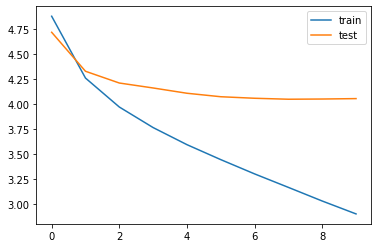

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=train_tokenizer_summary.index_word
reverse_source_word_index=train_tokenizer_text.index_word
target_word_index=train_tokenizer_summary.index_word

In [ ]:

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(article_max_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = word_dict['seosartt']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reversed_dict[sampled_token_index]
        
        if(sampled_token!='teosarss'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'teosarss'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
ds_train['headline'][:2]

0     seosartt keep related supplies in the same ar...
1     seosartt create sketch in the neopoprealist m...
Name: headline, dtype: object

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=word_dict['seosartt']) and i!=word_dict['teosarss'] and i!=word_dict['mepadding']):
            newString=newString+reversed_dict[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reversed_dict[i]+' '
    return newString

In [ ]:
for i in range(10):
    print("Reference:",dss_valid_headline[i])

    print("Original summary:",seq2summary(seq_val_summary[i]))
    print("Predicted summary:",decode_sequence(seq_val_text[i].reshape(1,article_max_len)))
    print("\n")


Reference: Drink more water.
Eat breakfast.
Eat well throughout the day.
Eat at the right times.
Consider going meatless.
Read the labels.
Get in shape.
Maintain a healthy weight.
Cross train.
Exercise wisely.
Take the little opportunities.
Think positively.
Be satisfied.
Think small.
Manage stress.
Choose your friends wisely.
Be productive.
Take a break.
Find emotional balance.
Stop engaging in risky behavior.
Exercise several times a week.
Get a good night's rest.
Learn how to cook.
Maintain your personal hygiene.
Bolster your immune system.
Original summary: treatment ignore result remember leash water make phone jealous cats exams one competition cats increase studies date for the with leash one soaked water sex things lay thought eye features cat plumage up remember second ways stick day many mean whole away food your commercial pick the dry boyfriend the tails angry like 
Predicted summary:  make tend help long get person your one around cat make slightly ask make part cat lower 

In [ ]:
!pip install sumeval
!python -m spacy download en

In [ ]:
from sumeval.metrics.rouge import RougeCalculator

def eval_rouges(refrence_summary,model_summary):
    #refrence_summary = "tokyo shares close up #.## percent"
    #model_summary = "tokyo stocks close up # percent to fresh record high"

    rouge = RougeCalculator(stopwords=True, lang="en")

    rouge_1 = rouge.rouge_n(
                summary=model_summary,
                references=refrence_summary,
                n=1)

    rouge_2 = rouge.rouge_n(
                summary=model_summary,
                references=[refrence_summary],
                n=2)
    
    rouge_l = rouge.rouge_l(
                summary=model_summary,
                references=[refrence_summary])
    
    # You need spaCy to calculate ROUGE-BE
    
    rouge_be = rouge.rouge_be(
                summary=model_summary,
                references=[refrence_summary])

  
    
    return rouge_1, rouge_2,rouge_l,rouge_be
  
#rouge_1, rouge_2,rouge_l,rouge_be = eval_rouges( "tokyo shares close up #.## percent",
#                                                "tokyo stocks close up # percent to fresh record high")
#
#print("ROUGE-1: {}, ROUGE-2: {}, ROUGE-L: {}, ROUGE-BE: {}".format(
#        rouge_1, rouge_2, rouge_l, rouge_be
#    ).replace(", ", "\n"))

In [ ]:
#https://pymotw.com/2/xml/etree/ElementTree/create.html

rouge_1_arr  = []
rouge_2_arr  = []
rouge_L_arr  = []
rouge_be_arr = []

from xml.etree import ElementTree
from xml.dom import minidom
from functools import reduce

def prettify(elem):
    """Return a pretty-printed XML string for the Element.
    """
    rough_string = ElementTree.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")
  
from xml.etree.ElementTree import Element, SubElement, Comment

top = Element('CSCE4290')

comment = Comment('Generated by Olufemi')
top.append(comment)
article =  ds_valid['text']
reference = ds_valid['headline']
i=0
for summ in summary_array:
  example = SubElement(top, 'example')
  article_element   = SubElement(example, 'article')
  article_element.text =article[i]
  
  reference_element = SubElement(example, 'reference')
  reference_element.text = reference[i]
  
  summary_element   = SubElement(example, 'summary')
  summary_element.text = summ

  rouge_1, rouge_2,rouge_L,rouge_be = eval_rouges(reference[i],summ )

  eval_element = SubElement(example, 'eval')
  ROUGE_1_element  = SubElement(eval_element, 'ROUGE_1' , {'score':str(rouge_1)})
  ROUGE_2_element  = SubElement(eval_element, 'ROUGE_2' , {'score':str(rouge_2)})
  ROUGE_L_element  = SubElement(eval_element, 'ROUGE_l' , {'score':str(rouge_L)})
  ROUGE_be_element  = SubElement(eval_element,'ROUGE_be', {'score':str(rouge_be)})
  
  rouge_1_arr.append(rouge_1) 
  rouge_2_arr.append(rouge_2) 
  rouge_L_arr.append(rouge_L) 
  rouge_be_arr.append(rouge_be) 

  i+=1

top.set('rouge_1', str(reduce(lambda x, y: x + y,  rouge_1_arr) / len(rouge_1_arr)))
top.set('rouge_2', str(reduce(lambda x, y: x + y,  rouge_2_arr) / len(rouge_2_arr)))
top.set('rouge_L', str(reduce(lambda x, y: x + y,  rouge_L_arr) / len(rouge_L_arr)))
top.set('rouge_be', str(reduce(lambda x, y: x + y, rouge_be_arr) / len(rouge_be_arr)))

with open("results.xml", "w+") as f:
  print(prettify(top), file=f)

In [ ]:
summary_array

[]